In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
class myCallbacks(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') >= 0.97:
      print("\nReached 97% accuracy so cancelling training!")
      self.model.stop_training = True
      

callbacks = myCallbacks()

In [ ]:
mnist = keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
training_images = training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)
training_images, test_images = training_images / 255.0, test_images / 255.0

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28,1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 10816)             0         
                                                                 
 dense_5 (Dense)             (None, 128)               1384576   
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
____________________________________________

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(training_images, training_labels, validation_split=5/60, epochs=20, callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1611 - accuracy: 0.9413 - val_loss: 0.2443 - val_accuracy: 0.9160
Epoch 2/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1383 - accuracy: 0.9481 - val_loss: 0.2660 - val_accuracy: 0.9126
Epoch 3/20
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1161 - accuracy: 0.9571 - val_loss: 0.2589 - val_accuracy: 0.9206
Epoch 4/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0990 - accuracy: 0.9633 - val_loss: 0.2781 - val_accuracy: 0.9154
Epoch 5/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0821 - accuracy: 0.9694 - val_loss: 0.3006 - val_accuracy: 0.9202
Epoch 6/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0678 - accuracy: 0.9753 - val_loss: 0.3194 - val_accuracy: 0.9180


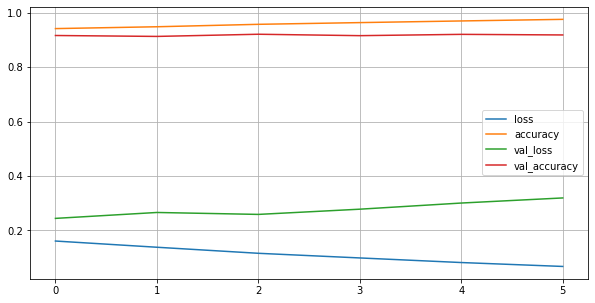

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

learning_data = pd.DataFrame(history.history)
learning_data.plot(figsize=(10,5))
plt.grid(True)
plt.show()

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.2507 - accuracy: 0.9101


[0.250737726688385, 0.910099983215332]

In [ ]:
pret = keras.models.load_model('my_keras_model.h5')
pret.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 10816)             0         
                                                                 
 dense_5 (Dense)             (None, 128)               1384576   
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
____________________________________________

In [ ]:
pret.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.2537 - accuracy: 0.9107


[0.2537122964859009, 0.9107000231742859]